<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
05 Introduction to Statistical Inference
<a class="tocSkip">   
</h1>  

## <span style='background:yellow; color:red'> Remember:<a class="tocSkip"> </span>     

+ Navigate to your `fmad2223` folder in the console/terminal.  
+ Execute `git pull origin main` to update the code
+ **Do not modify the files in that folder**, copy them elsewhere

In [2]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

## Central Limit Theorem and the Normal Distribution

### Precise Statement of the CLT

+ In previous sessions we have seen evidence that the sample means of several quite different types of initial populations were in all cases normally distributed. And now that we have a bit more of experience with the normal distribution we are in a position to state that result formally and to begin making use of it to do inference. 

+ So let us recall the context of the CLT. We want to understand the distribution of a certain quantitative random variable $X$. Let us use the symbols $\mu$ and $\sigma$ for the mean and standard deviation of $X$ respectively, as usual. 

+ We will try to estimate the value of $\mu$ by taking samples of $n$ values of this variable: 
$$
\quad\\
x_1,\, x_2,\,\ldots,\, x_n
\quad\\
$$
We are talking here about sampling at random and with replacement, so that we have **simple random sampling**. Then we can use the *sample mean*
$$
\quad\\
\bar x = \dfrac{x_1 + x_2 + \cdots + x_n}{n}
\quad\\
$$
to try to estimate $\mu$. 

+ **The sample space.** It is also important to recall that when considering the sample space (the set of all possible simple random samples) we are moving into a huge set even when the original population size and the sample size are modest. With a population of $1000$ individuals and size $n = 7$ samples we are looking at a sample space consisting of
$$
1000^7 = 1000000000000000000000
$$
different samples. These samples can turn out to be *bad* or *good* for our intent of estimating $\mu$. That is, a sample is *good* if the value of $\bar x$ in that sample is close to $\mu$, and *bad* if the value of $\bar x$ is misleading. To really understand the sampling process we need to understand the **distribution of the sample mean in the sample space**. That is precisely what the CLT does.  

+ **Statement of the Central Limit Theorem** Let $X$ be a random variable with mean $\mu$ and variance $\sigma^2$. Let $\bar X$ be the random variable describing the simple random sampling process. That is
$$\bar X = \dfrac{X_1+X_2+\cdots +X_n}{n}$$
where $X_1, \ldots, X_n$ are *independent copies of $X$*.
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{7cm}\textbf{Central Limit Theorem}
\quad\\
\quad\\
\text{When we consider}\textbf{ large enough }\text{ sample sizes $n$ the distribution of the sample mean in the sample space is}
\quad\\\quad\\
\hspace{7cm}\bar X \sim N\left(\mu_X,\frac{\sigma}{\sqrt{n}}\right) 
$
}
$$
</p> 
 
  What do we mean by *large enough?* The answer depends on the original population. If e.g. the original population is normal, then any sample size will do (even $n = 1$). But if you start with a highly asymmetrical population then the *large enough* value of $n$ may turn out to be quite high.

# Confidence Intervals for the Mean

## Intervals as Estimates

+ We begin with a simple case. Let us suppose that the variable $X$ is approximately normal, but its mean $\mu$ is unknown and we are trying to estimate it through sampling. This is a frequent situation because there are many variables in the real world that tend to be (approximately) normally distributed.

+ **Random Nature of the Sampling Error:** Let us suppose that we are taking a sample size $n$ large enough, so that the TCL applies for samples of size $n$. Then we can take a simple random sample and estimate $\mu \approx \bar X$. That means, of course:
$$
\quad\\
\mu = \bar X \pm \text{error}
\quad\\
$$
At this point this is not very formal, but it is very important to understand early on that **the error term that appears here depends on the sample and is therefore a random error.**

+ To make the statement above scientifically useful we need to quantify the size of the error. If we discover that the size of the error is smaller than $\delta$ (think of $\delta$ as a small number) then we can say that:
$$
\quad\\
\bar X - \delta < \mu < \bar X + \delta
\quad\\
$$
which means that we are thinking of an estimate in the shape of an interval $(a, b) =  (\bar X - \delta, \bar X + \delta)$. Next we will be using the TCL to get a precise description of this interval.


### The error is random!

+ We want to emphasize this because it is a central but often misunderstood idea in the foundations of Statistical Inference. The following figure (the code to generate it is in an external script) shows 20 different samples (of size $n = 30$) of the same approximately normal population. The red vertical dashed line indicates the mean of the population, which in this example is $\mu = 0$. The (solid blue) points from each of the sample are placed at the same horizontal lines. The mean for each sample is indicated with a red cross. It is extremely important to understand that these are all well formed samples, they were all obtained through the same sampling procedure. Yet, the quality of the information that they provide about $\mu$ is very different from one to the next. There are samples whose mean is really close to $\mu$ but some others (like sample number 2 in this case) have sample means that deviate more. This is what we mean when we say that the error is random. In a real situation you would not now were the red line is and you would have no way to assess the quality of a single sample just by looking at it. We just have to play with the cards that we have been dealt!  

  **Note:** the Python code to obtain the figure below is a bit more complicated, so it has been moved to an external script that you can find in the `code` folder of the repository. Take this chance also to learn how to call external scripts from a notebook by using the [*magic* commands from IPython](https://ipython.readthedocs.io/en/stable/interactive/magics.html) such as `%run` below.

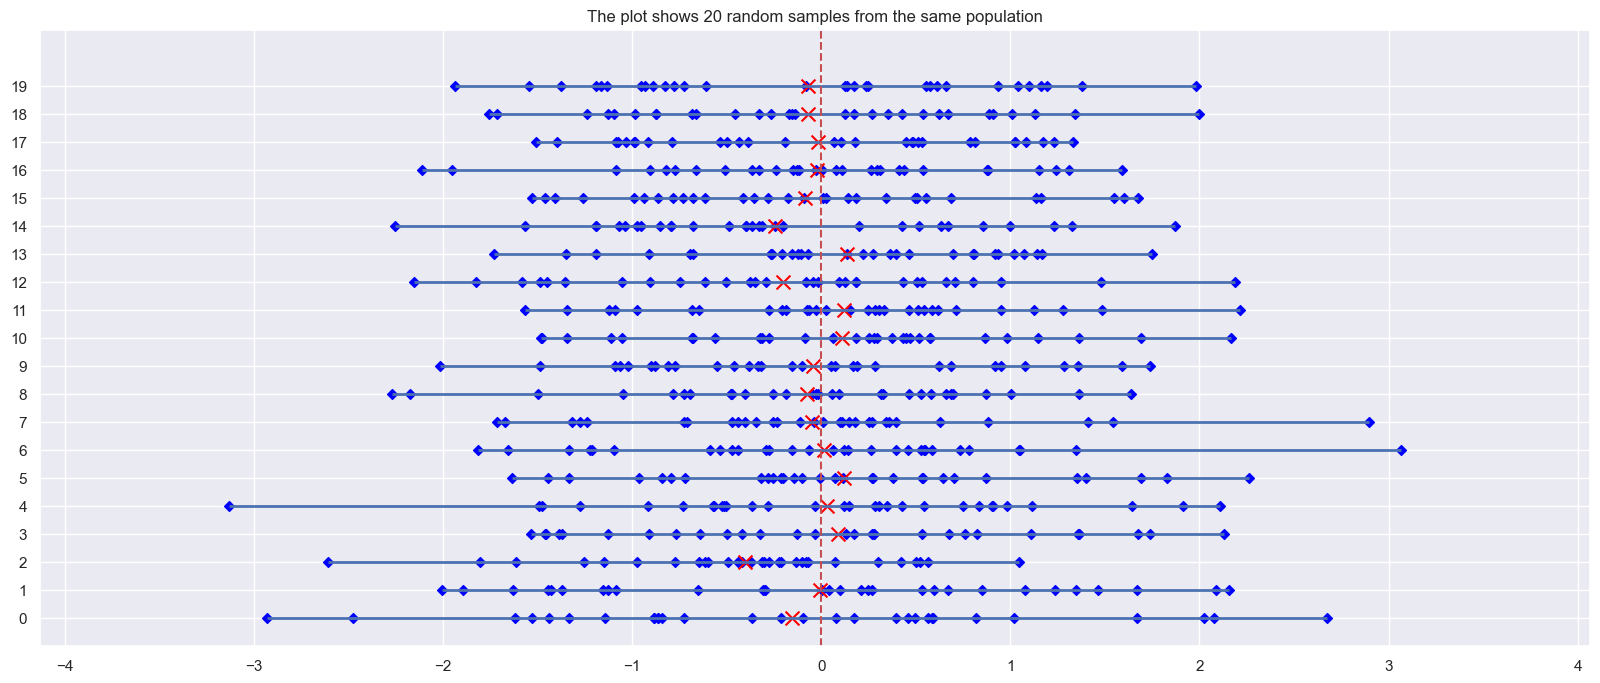

In [2]:
%run "code/05-inference-01.py"

## Confidence Intervals

Va a ser un intervalo para la media que viene acompañado por una estimación de probabilidad. Nivel de confianza. Para estar tranquilos con la muestra, normalmente trabajaremos con niveles de confianza del 95-99%. Esto querrá decir que el 95% de las muestras, contiene la media (código 05-inference-002). Para hacer el intervalo usaremos el teorema central del límite.
Para que coja el 95% de la probabilidad, tengo el 5% libre, como es la normal, son 2,5 a cada lado. Para ello, la K (punto en la X) debe ser 1,96. Se puede calcular con python:

mu = 0
sigma = 1

#a = ?
p = 0.025

print("X = {:.4f}".format(stats.norm.isf(p, loc = mu, scale = sigma)))


+ If we obtain a "*good*" sample then the error (when estimating $\mu$ with $\bar X$) will be small but if we get a "*bad*" enough sample the error can turn out to be quite large. The CLT guarantees that most of the random samples will be good in this particular sense. 

+ Remember once again that this distinction we are making between good and bad samples has nothing to do with the quality of the sampling process. A flawless sampling can lead to a very bad sample, just by chance. In order to make this process quantifiable we want to measure the **probability of coming across a bad sample**. And that is the reason why our interval estimation will take a probabilistic form.  
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{4cm}\textbf{Confidence Intervals}
\quad\\
\quad\\
\text{Let $cl$ be a confidence level (as probability or percent). An interval $(a, b)$ such that }
\quad\\
\quad\\
\hspace{4cm}P\left(a < \mu < b\right) = cl 
\quad\\
\quad\\
\text{is a }\textbf{confidence interval at level $cl$}\text{ for $\mu$}
$
}
$$
</p> 

+ The key in the above definition is that **the probability is measured over the (frequently huge in size) sample space**, consisting of all the simple random $n$-sized samples from the population. Then $cl$, the confidence level, indicates the probability of randomly getting a good sample. We can now begin to make this idea of a *good sample* more precise. We will see below how every sample can be used to obtain an interval estimate $(a, b)$ for the mean. The sample is *good* if $a < \mu < b$. The level of confidence measures the probability that the *interval from sample* method will lead to an interval that contains the mean. Again: it is an *statement about the method* or algorithm, it is *not a statement about any particular interval that the algorithm produces*. That is why we will always use high values of confidence level such as 95% or 99%, to make sure that there is a low probability that (we get a bad sample and) we obtain an interval not containing the true mean.

## How to obtain the confidence interval for $\mu$

+ Let us see the recipe for cooking confidence intervals.

+ **First ingredient:** For a normal population (or very approximately normal provided the sample size $n$ is large enough)  the CLT states that
$$
\quad\\
\bar X \sim N\left(\mu_X,\frac{\sigma}{\sqrt{n}}\right) 
\quad\\
$$
and in particular this implies that
$$
\quad\\
Z = \dfrac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}}
\quad\\
$$
is a standard normal $Z = N(0, 1)$.

+ **Second ingredient:** Given a confidence level $cl$, considered as a close-to-one probability, we already know how to obtain a symmetrical interval $(-K, K)$ such that:
$$
\quad\\
P(-K < \, Z \,<  K) = cl
\quad\\
$$
as illustrated in the picture below.
![](fig/06-02-ProblemaInversoZ-02.png)
Let us give $K$ a name. The shaded area in the figure is $cl$. That means that the probability left in *both tails together of Z* is 
$$\alpha = 1 - cl$$
In particular, due to the symmetry, each one of the tails has area equal to $\dfrac{\alpha}{2}$.
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{7cm}\textbf{Critical values for $Z$}
\quad\\
\quad\\
\text{Given a probability $p$,  the}\textbf{ critical value $z_p$}\text{ is the value of $Z$ for which the probability of the }\textbf{right tail}\text{ equals $p$. That is:}
\quad\\
\quad\\
\hspace{4cm}P\left(Z > z_p\right) = p 
\quad\\
\quad\\
\text{In particular, $K = z_{\alpha/2}$ in the previous figure}
\quad\\
\quad\\
\hspace{4cm}P\left(-z_{\alpha/2} < \, Z \,<  z_{\alpha/2}\right) = cl = 1 - \alpha
\quad\\
$
}
$$
</p> 

+ Now the recipe is very simple: substitute the expression for $Z$ in the first ingredient into this last expression from the second ingredient, and do some very simple algebra with the inequalities to arrive at the following:
<p style='font-family: Optima'>
$$
\fbox{
$
\quad\\
\hspace{1.5cm}\textbf{Preliminary expression for the confidence interval}
\quad\\
\quad\\
\text{A confidence interval $(a, b)$ for $\mu$ with a confidence level $cl$ is provided by:}
\quad\\
\quad\\
\hspace{4cm}a = \bar X - z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}, \qquad\qquad 
  b = \bar X + z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}
\quad\\
\quad\\
\text{Or equivalently:}
\quad\\
\quad\\
\hspace{4cm}\mu = \bar X \pm z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}
\quad\\
$
}
$$
</p> 

+ **Why is this a preliminary expression?** Because we want a method to obtain the interval using the information from the sample, without additional information about the population parameters. And this expression uses $\sigma$, which is a population (therefore unknown) parameter. 

### The Large Samples Approximation..

+ To overcome this problem of the unknown value of $\sigma$ we will assume that population is normal (or very approximately normal) and that the sample size $n$ is large enough. If this is the case, then we can replace $\sigma$ by $s$, the standard deviation of the mean to get at our first really useful formula for a confidence interval:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{0.5cm}\textbf{Confidence interval for the mean, normal population, large sample.}
\quad\\
\quad\\
\text{A confidence interval $(a, b)$ for $\mu$ with a confidence level $nc$ is provided by:}
\quad\\
\quad\\
\hspace{4cm}\mu = \bar X \pm z_{\alpha/2}\dfrac{s}{\sqrt{n}}
\quad\\
$
}
$$
</p> 

$z_p$ es el que deja a la derecha el valor p.

Si quiero trabajar con un nivel de confianza del 99% (quiere decir que tengo en el 99 en el medio) lo que querremos será el $z_{0.005}$

+ What do we mean by **large sample**? Traditionally $n \geq 30$ was considered large enough for normal populations. But to get more accurate results we recommend taking at least $n \geq 100$. This sample size helps the effects of the CLT kick in.




In [3]:
stats.norm.ppf(0.995) # El 99,5% de las muestras van a dar intervalos que vengan de la región -2.57-2.57
# ppf -> Cola izquierda
# cdf -> Cola derecha

2.5758293035489004

+ **Example:** A sample from a **normal** population has these *sample values*:
$$
n = 100,\quad \bar X = 7.34,\quad s= 0.31
$$ (Todos estos datos los podemos sacar de la muestra en caso de que nos la dieran)

Let $cl = 0.95$ (thus $\alpha = 1- cl = 0.05$). Let us use these values to obtain a 95% confidence interval for the mean $\mu$ of the population from which this sample originated. We begin by using Python to find the critical point
$$z_{\alpha/2} = z_{0.025}$$
We already did this as exercise S04-006 in the previous session, so let us just repeat the code here (and read that part of the session if you need to refresh your ideas):

In [4]:
cl = 0.95
alpha = 1 - cl # both tails
print("The two tails should add up to: {:.3}".format(alpha))
prob_1_tail = alpha / 2
print("Therefore each tail has probability = {:.3}".format(prob_1_tail))
print("But the ppf function in NumPy works with the left tail and so we ") 
print("need to find the probability of the left tail of the critical point, which is")
prob_left_tail_crit_point = 1 - prob_1_tail
print("{:.3}".format(prob_left_tail_crit_point))
print("Now we can use ppf to find the critical point for this confidence level:")
crit_point = stats.norm.ppf(prob_left_tail_crit_point, loc = 0, scale = 1)
print("{:.6}, approximately  {:.3}".format(crit_point, crit_point))
print("Alternative using the inverse survival function:")
crit_point = stats.norm.isf(prob_1_tail, loc = 0, scale = 1)
print("{:.6}, approximately  {:.3}".format(crit_point, crit_point))

The two tails should add up to: 0.05
Therefore each tail has probability = 0.025
But the ppf function in NumPy works with the left tail and so we 
need to find the probability of the left tail of the critical point, which is
0.975
Now we can use ppf to find the critical point for this confidence level:
1.95996, approximately  1.96
Alternative using the inverse survival function:
1.95996, approximately  1.96


+ Now we can plug this value for $z_{\alpha/2}$ and the rest of the sample values in the expression for the confidence interval and we arrive at:

In [5]:
n = 100
barX = 7.34
s = 0.31

# Short version of the critical point computation:
cl = 0.95
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The confidence interval is  [7.27924112 7.40075888]
Rounded to 4 digits: [7.279, 7.401]


+ **Exercise (S05-001):** Using the data in the `05-Conf_Interval_LargeSample.csv` file (you sholud already have this in your `data` subfolder of the `fmad2223` folder if you keep the repository updated) find a 95% confidence interval for the mean of the data. 

In [33]:
df = pd.read_csv("data/05-Conf_Interval_LargeSample.csv")
df

,x
0,4.850140
1,4.401927
2,4.644028
3,3.903355
4,4.404141
...,...
115,4.597010
116,5.083934
117,4.495165
118,4.631862


In [34]:
# %load "./exclude/S05-001.py"
'''
Cola izquierda:
    - ppf
    - cdf 
para intervalos de confianza normalmente miramos la cola derecha (por eso usamos la inversa)
'''
# Tamaño de la muestra
n = len(df)
# Media
barX = df.x.mean()
# Varianza
s = df.x.std()

# Short version of the critical point computation:
cl = 0.95
alpha = 1 - cl
# Funcion de supervivencia inversa. queremos ir de probabilidades a puntos. calcular qué queda en cada una de las colas. 
# como tenemos un intervalo de conf del 95, tenemos a cada lado un 2,5 (en total 5, alpha)
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)
# Estos prints salen iguales porque es calcular lo mismo, la inversa de la cola derecha, o el ppf con 1- alfa/2, que es el contrario
print(crit_point)
print(stats.norm.ppf(1 - alpha/2, loc = 0, scale = 1))
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))


1.959963984540054
1.959963984540054
The confidence interval is  [4.37453498 4.48546502]
Rounded to 4 digits: [4.375, 4.485]


## Back to the Random Nature of Estimation

+ Now that we have a working formula for the confidence interval we will go back to the previous example of 

The plot shows 100 confidence intervals (95% conf. level) from random samples of the same population
In this case  94  of these intervals contain the true mean.


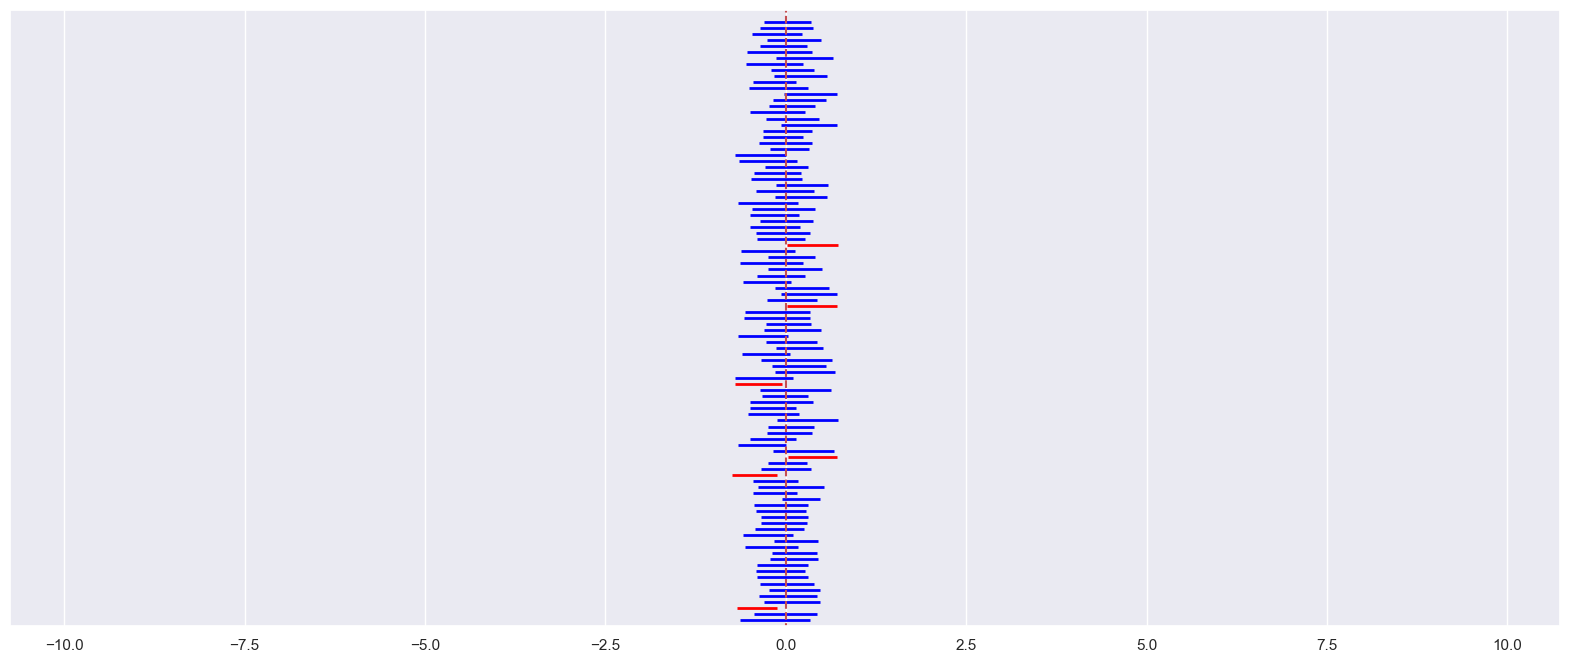

In [7]:
%run "code/05-inference-02.py"

## Determining the Sample Size

+ It is very important to understand that the construction of the confidence interval involves two different sources of uncertainty:

    1. The width of the symmetrical interval $(a, b) = \mu\pm\delta$ is related to the **precision** (or conversely the error) in our estimate of $\mu$ (in $X$ original units). Thus, the narrower the interval the better. 
    
    2. But the **confidence** level $cl$ measures the (sample space) probability of that estimation, which depends on how lucky we were in the sampling step. Thus, values of $cl$ closer to 1 are better. 
    
  Unfortunately, precision and confidence are not independent and in practice we need to find a balance between aiming at a higher precision and working with high confidence levels 
  
+ It is intuitively clear that if we want more precision we should try to get larger samples. Recall that the preliminary expression for the confidence interval said:
$$
\mu = \bar X \pm z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}
$$
This implies that the precision (half-width) of the confidence interval is:
$$
\delta = z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}
$$
Therefore, if we wish to obtain an interval with a precision such that $\delta < 0.0001$ we can try to solve the above for $n$ and we arrive at this expression for the required sample size:
$$
z_{\alpha/2}\cdot\dfrac{\sigma}{\sqrt{n}} < \delta \qquad \Rightarrow \qquad 
n > \left(\rule{0cm}{0.8cm}z_{\alpha/2}\cdot\dfrac{\sigma}{\delta}\right)^2
$$
But since $\sigma$ is unknown we usually conduct a *pilot study* with a comparatively small sample size and use it to estimate $\sigma$ by means of $s$. And then we use the above expression replacing $\sigma$ with the $s$ value from the sample study.



+ **Example:** We wish to estimate the mean diameter of some machinery parts produced at a factory. We assume that the diameter of those parts follows very approximately a normal distribution. A pilot experiment concluded tha the standard deviation of the parts diameter was $s = 1.3$mm. The factory managers require an estimate of the diameter with an error no bigger than $0.1$mm and a confidence level of $99\%.$ What sample size do we need to achieve that goal?  
Thus we want $\delta=0.1$mm and $nc=0.99$. Let us use Python to get the required critical value and the minimum sample size: 

In [8]:
# formula de arriba
# Cuando es una distribución aproximadamente normal, podemos cambiar sigma por s y no estará mal, son equivalentes
delta = 0.1
s = 1.3
# Para sacar s, sacariamos una mustra pequeña del conjunto de datos (aleatoria), y calcularíamos la varianza

# Critical point computation:
cl = 0.99
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)
print("The critical point for cl = ",cl, " is approx. {:.4}".format(crit_point))

min_sample_size = np.ceil((crit_point * s / delta)**2)

print("The minimum sample size is at least n = ", min_sample_size.astype(int), 
      "(but possibly bigger).")

The critical point for cl =  0.99  is approx. 2.576
The minimum sample size is at least n =  1122 (but possibly bigger).


+ Always keep in mind that in examples like this the results depend on the reliability of the pilot study, and so we must err on the side of caution, rounding up to larger values of $n$.

+ Look at the above expression for the sample size:
$$
n > \left(\rule{0cm}{0.8cm}z_{\alpha/2}\cdot\dfrac{\sigma}{\delta}\right)^2
$$
as you can see $z_{\alpha/2}$ is in the numerator, while $\delta$ is in the denominator. In particular that means that if we keep the sample size $n$ fixed we can not increase precision (make $\delta$ smaller) without making $z_{\alpha/2}$ closer to the origin, which means working at a lower confidence level. This is an example of the interdependence between precision and confidence that we mentioned before.

+ **Exercise (S05-002):** In a previous exercise you used the data from `05-Conf_Interval_LargeSample.csv` to get a confidence interval for the mean using the sample in that file. What was the width of that interval? What sample size would you need to find a 95% confidence interval with a precision $\delta = 10^{-3}$. Use Python to find the answer.

In [37]:
# %load "./exclude/S05-002.py"
# cual era la anchura de lo que hemos hecho antes
df = pd.read_csv("data/05-Conf_Interval_LargeSample.csv")
df

#Para determinar la anchura no es necesaria la media muestral, ni el tamaño, nos interesa el valor de s
# n = len(df)# Tamaño de la muestra
# barX = df.x.mean()# Media
s = df.x.std() # Varianza

delta = 0.001

# Short version of the critical point computation:
cl = 0.95
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

min_sample_size = np.ceil((crit_point * s / delta)**2)
print("The minimum sample size is at least n = ", min_sample_size.astype(int), 
      "(but possibly bigger).")


The minimum sample size is at least n =  369165 (but possibly bigger).


# The Case of Small Samples in Normal Populations

+ Our previous results about confidence intervals ultimately relied on the sample size being large enough to justify using $s$ as a replacement for the unknown population parameter $\sigma$. What should we do if we know that the population is very approximately normal but we only manage to get a small sample of size e.g. $n = 15$?

+ As the sample gets smaller we have less and less information about the population. And this clearly implies that in a wider (less precise) confidence interval. In particular, that means that the critical points provided by the normal are wrong, because they are too close to the origin to account for this loss of precision. In the turn of the 20th century the statistician W. Gosset, known by his pseudonym *Student*, figured out the necessary corrections to the normal distribution and created a family of distributions to obtain the right choice of critical values. These distributions are known as the **Student's $t$ family of distributions**, and there is one such Student's $t$ for each sample size.

+ The Student's $t$ distributions are bell-shaped and symmetrical with mean 0, much like the standard normal $Z$, but the main difference is that the Student's $t$ have so-called **heavier tails**, meaning that a larger chunck of the total probability under the curve is shifted or squeezed towards infinity. The following figure illustrates this for a concrete choice of Student's $t$. You can see that the tails of the Student's $t$ are above those of $Z$ as we move towards $\infty$ (and correspondingly, Student's $t$ has less probability concentrated in the central region close to 0).
![](./fig/06-04-TvsZ.png)

In [1]:
from IPython.display import IFrame
IFrame("https://www.geogebra.org/m/xegwa6cr",800,800)
# A medida que aumenta el tamaño de la muestra, las dos son prácticamente iguales


### Degrees of Freedom and Sample Size

+ We have already said that there is a different Student's $t$ for each sample size. The relationship between the sample size and Student's $t$ uses the notion of *degrees of freedom (dof)* where:
$$
dof = n - 1
$$
for a sample of size $n$. That is, when we work with samples of size $n$ the appropriate critical points are provided by the Student's $t$ with $dof = n - 1$. If, for example we have $n = 10$ then we must use the Student's distribution called $t_9$, where the symbol $t_{dof}$ is used to identify the degress of freedom.

+ Recall that we saw before that for large enough samples the use of Student's $t$ is not necessary and we can fall back to $Z$ and the critical points it provides. This in turn is equivalent to saying that for large enough $n$ the density curve of $Z$ and $t_{n - 1}$ are almost identical.

## Confidence Intervals Using Student's $t$

+ The main contribution of Student's $t$ to the theory of small sample estimation is a new collection of critical points
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{4cm}\textbf{Critical values for Student's $t$}
\quad\\
\quad\\
\text{Given a sample size  $n$ and a probability $p$, the}\textbf{ critical value $t_{k;p}$}\text{(where $k = n - 1$)}\\
\text{ is the value of $t_{n - 1}$ for which the probability of the }\textbf{right tail}\text{ equals $p$. That is:}
\quad\\
\quad\\
\hspace{4cm}P\left(t_{k;p} > z_p\right) = p 
\quad\\
\quad\\
$
}
$$
</p> 

+ The critical points are all we needed in order to obtain this expression:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\textbf{Confidence interval for the mean, normal population, small samples using Student's $t$.}
\quad\\
\quad\\
\text{For a small sample size $n$ a confidence interval $(a, b)$ for $\mu$ with a confidence level $nc$ is provided by:}
\quad\\
\quad\\
\hspace{4cm}\mu = \bar X \pm t_{n - 1;\alpha/2}\dfrac{s}{\sqrt{n}}
\quad\\
$
}
$$
</p> 

### Student's $t$ in Python

+ Working with $t_k$ in Python is easy with the help of [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Take a look at the documentation and the methods provided before moving on to the examples below.

+ **Exercise (S05-003):** we suspect that the waters of a reservoir have $NO_2$ levels higher than the safe threshold for aquatic life. To study this problem we test the water concentration of $NO_2$ (mg/l) at 10 different points at random in the reservoir and we obtained these values:  
```
        0.04, 0.05, 0.03, 0.06, 0.04, 0.06, 0.07, 0.03, 0.06, 0.02
```        
Use `scipy.stats.t` and find a 95% confidence level interval for the mean $NO_2$ concentration in the water of the reservoir. The danger level for $NO_2$ is 0.03mg/l. What is your conclusion?

In [41]:
# %load "./exclude/S05-003.py"
data = np.array([0.04, 0.05, 0.03, 0.06, 0.04, 0.06, 0.07, 0.03, 0.06, 0.02])

n = len(data)# Tamaño de la muestra
dof = n - 1 # T de studient = 9. Porque la muestra es de 10 elementos
barX = data.mean()# Media
s = data.std()# Varianza

# Critical point computation with the Student's T:
cl = 0.95
alpha = 1 - cl
# Usamos t en vez de norm para cambiar la distribución que usamos
crit_point = stats.t.isf(alpha/2, df=dof)# sin loc y scale, eso es solo para la normal, decirle que está centrada
print(f"Punto crítico calculado para la T de Student: {crit_point}")

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))


Punto crítico calculado para la T de Student: 2.2621571627409915
The confidence interval is  [0.03482577 0.05717423]
Rounded to 4 digits: [0.03483, 0.05717]


+ **Exercise (S05-004):** Using the variable `gear_ratio` variable from the `auto2` data set, find a 95% confidence interval for the mean of that variable.  

In [12]:
# %load "./exclude/S05-004.py"


### The Remaining Case: Non Normal  Populations

+ When the population is definitely not normal then in order to obtain confidence intervals for the mean we should turn to other methods, in particular the family of **non parametric methods**.

# Confidence Intervals for the Variance in Normal Populations

+ After dealing with $\mu$ the obvious natural step is to ask ourselves about $\sigma^2$, the population variance. Our starting point is again the case of (at least approximately) normal populations, in order to keep our work under the protection of the CLT and similar results. 

+ The first natural idea, when working with a normal random variable $X\sim N(\mu, \sigma)$ is to try to estimate $\sigma^2$ using the value of $s^2$ in a random sample of the population. In order for this idea to become useful we need something like the description of the sample distribution of the mean provided by the CLT, but in this case for $s^2$ instead of $\bar X$.

+ Before getting into the technical details keep in mind that $\mu$ is a *position or center measure* and therefore we are interested in deviations from $\mu$ in the form of differences $\mu - \bar X $. Meanwhile, $\sigma^2$ is a measure of *spread* or *dispersion*. Therefore it is not the differences that matter, but the *quotients*. Think about that: when we compare two populations in terms of dispersal we usually make statements such as "this population is **twice** as spread as the other". Dispersion has a multiplicative nature.

+ Keeping that in mind, the sampling distribution result we require is this:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\textbf{Sampling Distribution of $\sigma^2$ in normal populations.}
\quad\\
\quad\\
\text{If $X\sim N(\mu, \sigma)$ and we consider samples of size $n$ then:}
\quad\\
\quad\\
\hspace{4cm}(n - 1)\dfrac{s^2}{\sigma^2}\sim\chi^2_{n - 1}
\quad\\
\quad\\
\text{where $\chi^2_{n - 1}$ is the }\textbf{chi-squared distribution with $dof = n - 1\quad$}
$
}
$$
</p> 
Let us see what this chi-squared distributions look like. 

+ Just like the Student's $t$ (to which it is related) the Chi-squared distribution is indeed a family of distributions, one for each sample size. It is however different in that it **only takes positive values and it is highly asymmetrical.** The typical plot of the density curve for one of these Chi-squared distributions is:
![](fig/06-06-DensidadChiCuadrado.png)
That is in fact the graph of $\chi^2_4$. This asymmetry impacts as we will see in the construction of confidence intervals based on these distributions.

In [2]:
from IPython.display import IFrame
IFrame("https://www.geogebra.org/m/k4rvfbhf",800,800)


### Chi-squared Distributions with Python

+ Before moving further please take a look at the SciPy documentation for [scipy.stats.chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2). After your experience with the normal and Student's $t$ you should now be seeing a common pattern in the way that all these distributions are handled in the `scipy.stats` module. 

## Confidence Interval Expression for the Variance

+ The main difference in this case is that the lack of symmetry in the $\chi^2$ distribution forces us to use two different critical points, one at each side of the distribution, as illustrated in this figure:
![](fig/06-07-ChiCuadradoValoresCriticosIntervalo.png)


</br></br>

+ The **definition of the critical points** is what you expect:
$$
P(Y > \chi^2_{k;p}) = p
$$
for any probability $p$ and $k = n - 1$ degrees of freedom. And with this we can state the expression:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\textbf{Confidence interval for the variance in normal populations with sample size $n$.}
\quad\\
\quad\\
\hspace{4cm}\dfrac{(n-1)s^2}{\chi^2_{k,\alpha/2}}\leq\sigma^2\leq\dfrac{(n-1)s^2}{\chi^2_{k,1-\alpha/2}} ,
\quad\\
\text{where $k = n-1$.}
\quad\\
$
}
$$
</p> 

+ **Exercise (S05-005):** a random variable $X$ is normally distributed. A random sample of $n= 7$ values of $X$ had $s^2 = 62$. Use Python to find a 95% confidence level interval for the variance $\sigma^2$ of $X$.

In [4]:
# %load "./exclude/S05-005.py"
# usamos chi2 porque estamos calculando el nivel de confianza para la varianza.
n = 7
s2 = 62
dof = n - 1 

# Niveles de confianza
cl = 0.95
alpha = 1 - cl # Colas

chiLeft = stats.chi2.ppf(alpha/2, df = dof) #Ppf para la cola derecha
#chiRight = stats.chi2.ppf(1 - alpha/2, df=dof) #Ppf para la cola izquierda (con 1-alfa/2)
chiRight = stats.chi2.isf(alpha/2, df=dof) #Isf para la cola izquierda (con alfa/2) MEJOR ESTA OPCION
print(chiLeft, chiRight)

# Hay que tener cuidado porque nos puede salir al reves (mayor, menor).
# No pasa nada, se prueba y si sale al revés se cambia. Intervalo normal (menor, mayor)
conf_int = np.array([dof * s2/chiLeft, dof * s2/chiRight])
conf_int = np.array([dof * s2/chiRight, dof * s2/chiLeft])
print(conf_int)

conf_int_sigma = np.sqrt(conf_int)
print(conf_int_sigma)

1.237344245791203 14.44937533544792
[ 25.74505758 300.64390024]
[ 5.07395877 17.33908591]


+ **Exercise (S05-006):** Use Python to find a 95% confidence level interval for the variance $\sigma^2$ of
the variable `gear_ratio` variable from the `auto2` data set

In [15]:
# %load "./exclude/S05-006.py"

# Assessing Normality

+ A large part of the inference methods from classical Statistics rely on the assumption that the population under study is at least approximately normal. How can we check that assumption? In large samples we can look at histograms and density curves. The next figure shows on the left a sample of normal data (variable "X1") and on the right a sample of clearly non-normal data (variable "X2"), with sample size $n = 500$ in both cases.

In [3]:
np.random.seed(2022)
N = 500
df = pd.DataFrame({"x1":np.random.normal(size = N),
                  "x2":np.random.chisquare(df = 4, size = N)})
print(df[:10])
df_long = df.melt()
print(df_long[:10])
plt.rcParams['figure.figsize'] = [15, 7]
sns.displot(data = df_long, x = "value", col= "variable", kde = True, bins = 50)
plt.show()


NameError: name 'np' is not defined

 + Some of the classical methods will work even when the population is not normal, as long as it is symmetric. We can check that in the above plots, but also with the help of boxplots. For the same two examples as before:

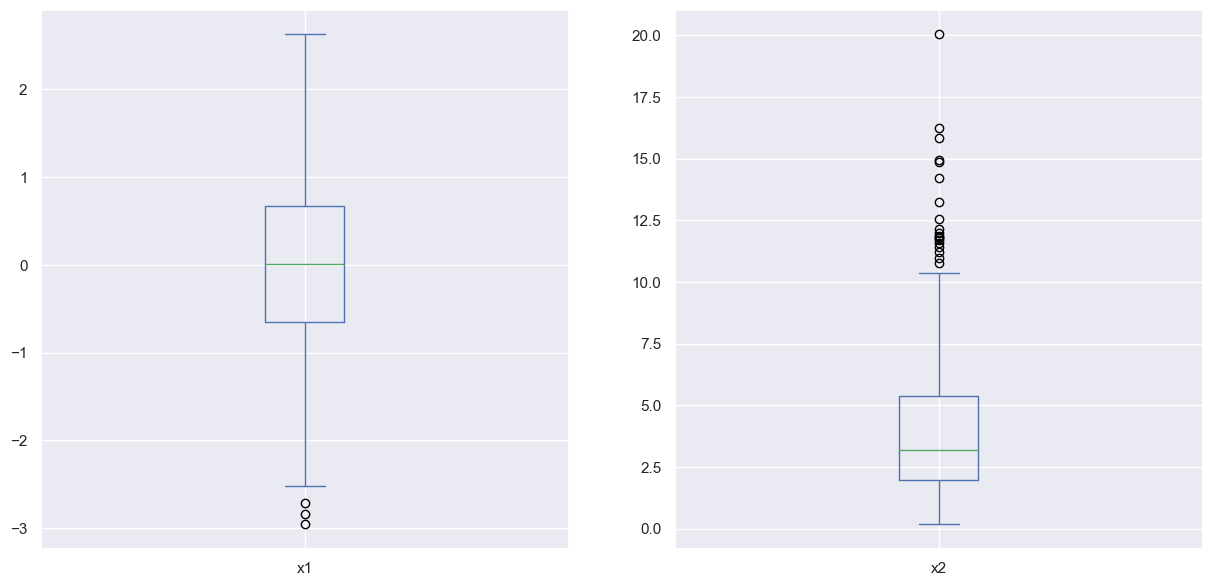

In [17]:
ax = df.loc[:, ["x1","x2"]].plot.box(
    subplots=True, layout=(1,2), sharex=False, sharey=False)

## QQplots

+ The name comes from "quantile vs quantile plots" because the horizontal axis represents the quantiles or percentiles of a normal (the theoretical precise values) while the vertical axis contains the empirical percentiles of the sample. Thus, if the sample comes from a normal distribution the points should fall on a  line. See below for the two samples we have been using (normal to the left, non-normal to the right). This is probably the most widely used kind of plot to check the normality of a sample. 

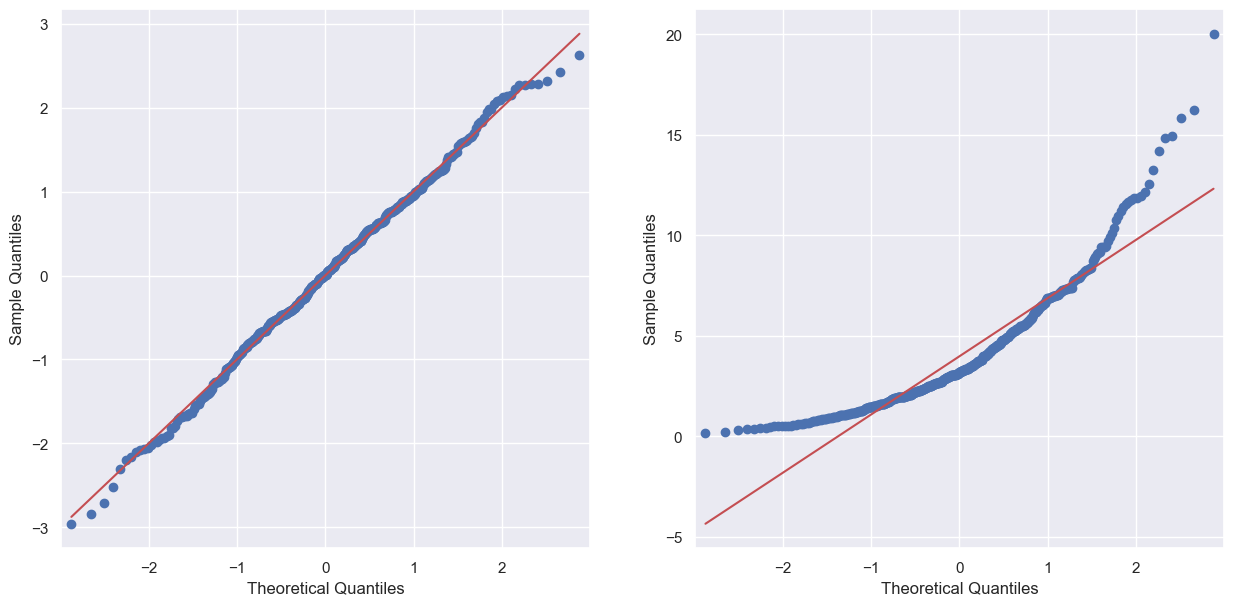

In [18]:
import statsmodels.api as sm
ax1 = plt.subplot(121)
sm.qqplot(df.x1, line="s", ax=ax1)
ax2 = plt.subplot(122)
sm.qqplot(df.x2, line="s", ax = ax2)
plt.show()

## Normality for Small Samples.

+ But for smaller samples things are not so clear-cut. The following series of plots shows the density curves for 12 different small samples of size $n = 10$ **of the same normal population!!** The plots are very different from one another and in many cases also clearly different from the normal density curve. This should serve as a warning about the dangers of small samples: assessing normality is very difficult, for starters. There are formal criteria to do that but in many cases those criteria simply provide a false feeling of safety, with little evidence supporting it. If you have a very small sample either use methods that do not depend on the hypothesis of normality or solve the normality issue by other means (expert knowledge, perhaps).

           x  sample
0  -0.000528       0
1  -0.274901       0
2  -0.139286       0
3   1.984686       0
4   0.282109       0
5   0.760809       0
6   0.300982       0
7   0.540297       0
8   0.373497       0
9   0.377813       0
10 -0.090213       1
11 -2.305943       1
12  1.142760       1
13 -1.535654       1
14 -0.863752       1
15  1.016545       1
16  1.033964       1
17 -0.824492       1
18  0.018905       1
19 -0.383344       1
20 -0.304185       2
21  0.997292       2
22 -0.127274       2
23 -1.475886       2
24 -1.940906       2


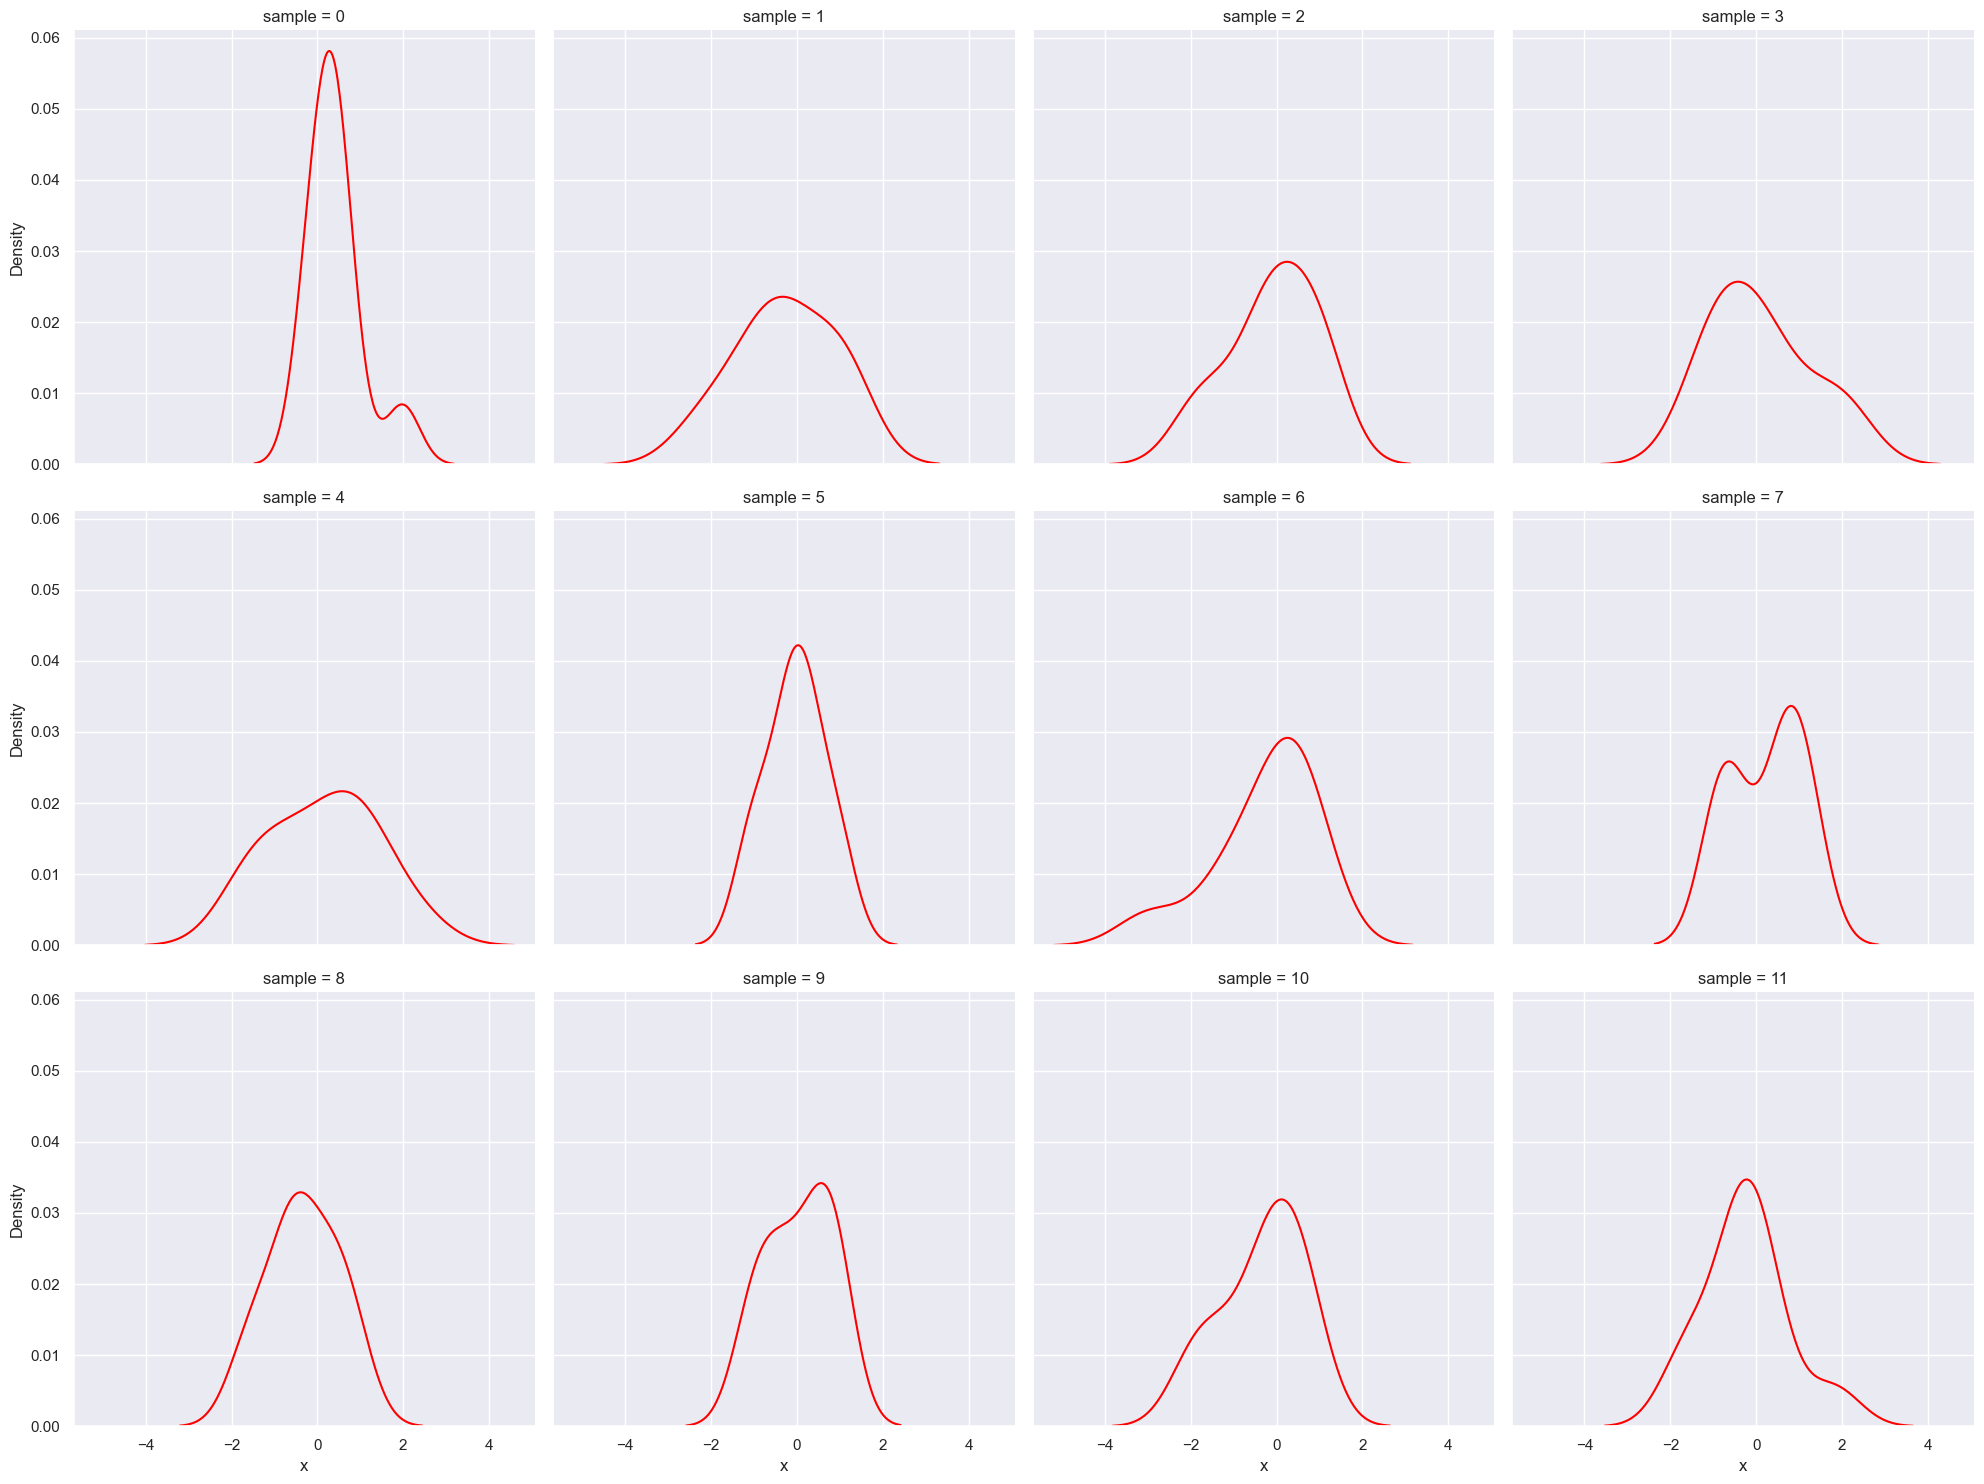

In [51]:
np.random.seed(2022)
n = 10
N = 12 

df = pd.DataFrame({"x":np.random.normal(size = N * n),
                  "sample":np.repeat(np.arange(N), n)})

print(df.head(25))
plt.rcParams['figure.figsize'] = [15, 7]
sns.displot(data = df, x = "x", col= "sample", col_wrap=4, kind="kde", color="red")
plt.show()

+ The same thing happens when using boxplots:

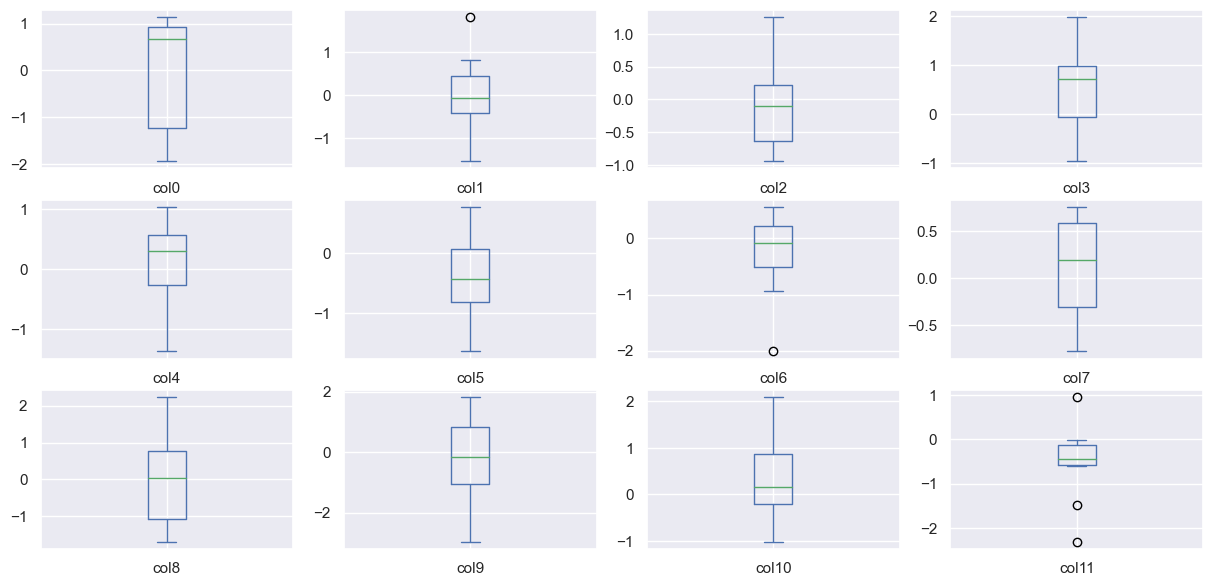

In [20]:
np.random.seed(2022)
n = 10
N = 12 

df = pd.DataFrame(np.random.normal(size = (n, N)), columns=["col" + str(_) for _ in range(N)]
                 )
df.plot.box(subplots=True, layout=(3, 4), sharex=False, sharey=False)

plt.show()


+ And similarly, trying to decide about normality using the qq-plot is very hard with so few data points.

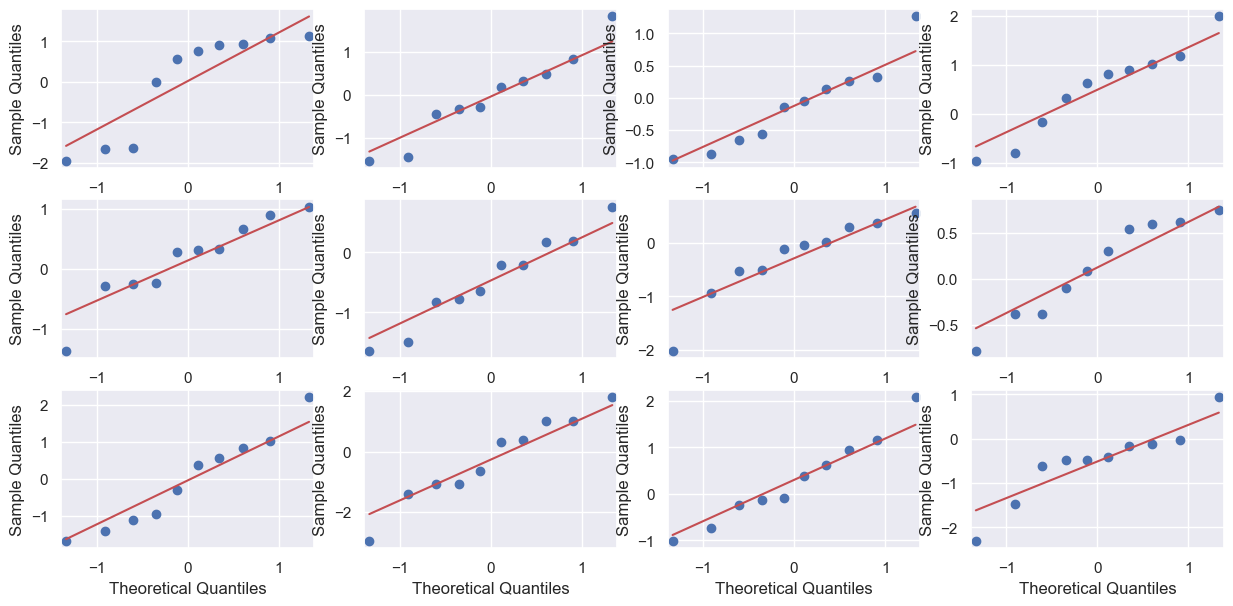

In [21]:
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    sm.qqplot(df.iloc[:, i], line="s", ax=ax)
    